<a href="https://colab.research.google.com/github/nadeemlameec/Data_science/blob/main/Prophet_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('ecv.csv')
df

,Date,ECV Count
0,16-Apr-2024,1
1,26-Jul-2024,1
2,27-Jul-2024,1
3,28-Jul-2024,1
4,30-Jul-2024,1
...,...,...
276,24-Jul-2025,2
277,25-Jul-2025,1
278,26-Jul-2025,17
279,27-Jul-2025,14


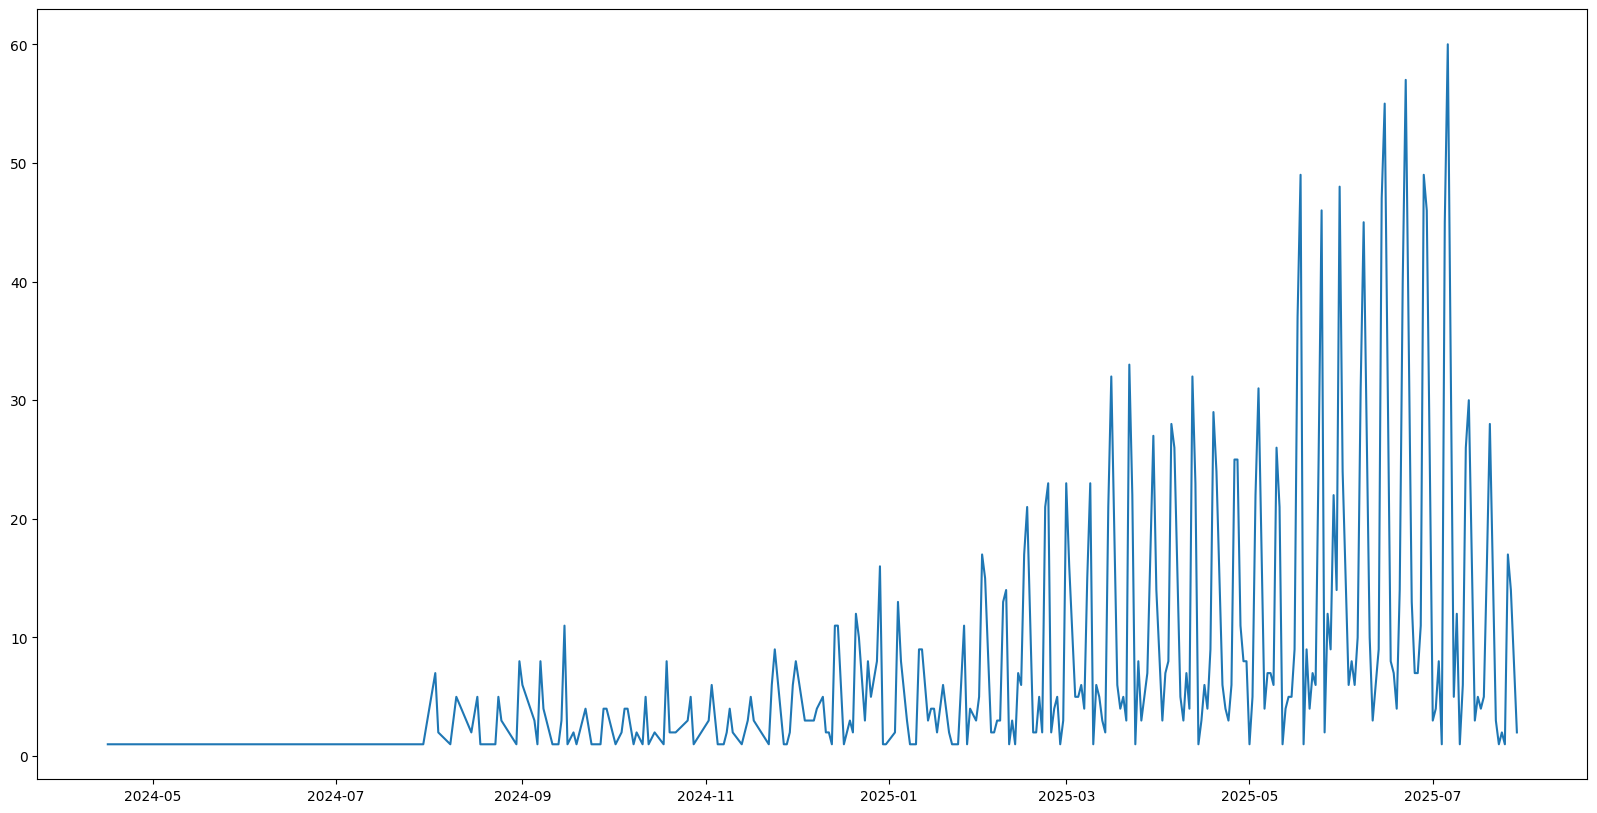

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['ECV Count'])

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       281 non-null    datetime64[ns]
 1   ECV Count  281 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.5 KB


In [ ]:
df = df.rename(columns={"Date": "ds", "ECV Count": "y"})
df["ds"] = pd.to_datetime(df["ds"])


In [ ]:
m = Prophet()


In [ ]:
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbviixd8z/raluktd3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbviixd8z/4n15o32m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67247', 'data', 'file=/tmp/tmpbviixd8z/raluktd3.json', 'init=/tmp/tmpbviixd8z/4n15o32m.json', 'output', 'file=/tmp/tmpbviixd8z/prophet_modelxa4i9pqc/prophet_model-20250904132235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=600,freq='D')
forcast = m.predict(future)

In [ ]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
876,2027-03-17,52.435553,39.144364,56.564559,51.362816,53.509009,-4.806035,-4.806035,-4.806035,-4.806035,-4.806035,-4.806035,0.0,0.0,0.0,47.629518
877,2027-03-18,52.494440,38.945424,58.332527,51.418629,53.570251,-4.330200,-4.330200,-4.330200,-4.330200,-4.330200,-4.330200,0.0,0.0,0.0,48.164240
878,2027-03-19,52.553326,39.043828,58.297000,51.474442,53.631357,-3.436107,-3.436107,-3.436107,-3.436107,-3.436107,-3.436107,0.0,0.0,0.0,49.117218
879,2027-03-20,52.612212,53.855243,71.859061,51.530449,53.692525,10.009505,10.009505,10.009505,10.009505,10.009505,10.009505,0.0,0.0,0.0,62.621716
880,2027-03-21,52.671098,54.958866,73.552817,51.586650,53.753693,11.418925,11.418925,11.418925,11.418925,11.418925,11.418925,0.0,0.0,0.0,64.090023


In [ ]:
forcast['yhat'].sum()

np.float64(23595.52538569609)

In [ ]:
!pip install prophet


In [ ]:
from prophet.plot import plot_plotly,plot_components_plotly


In [ ]:
plot_plotly(m,forcast)

In [ ]:
plot_components_plotly(m,forcast)

In [ ]:
a=forcast[['ds','yhat']]

In [ ]:
a.to_csv("output.csv", index=False)



ValueError: Less data than horizon after initial window. Make horizon or initial shorter.